In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.datasets import load_iris 

In [277]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [278]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [279]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [280]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [281]:
Y=iris.target
X=df.drop(['target', 'flower_name'],axis=1).values

In [282]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=10)

In [283]:
y_test

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [284]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [285]:
model.score(x_test, y_test)

1.0

In [286]:
acc=0;
for i in range (1,51):
    modl=RandomForestClassifier(n_estimators=i)
    accuracy = 100*model.score(x_test,y_test)
    if(acc<accuracy):
        acc = accuracy
        curr_i = i;
    print("n_estimator: {}, accuracy: {}".format(i,accuracy))
print("Maximum accuracy at n_estimator: {}, accuracy: {}".format(curr_i,acc))

n_estimator: 1, accuracy: 100.0
n_estimator: 2, accuracy: 100.0
n_estimator: 3, accuracy: 100.0
n_estimator: 4, accuracy: 100.0
n_estimator: 5, accuracy: 100.0
n_estimator: 6, accuracy: 100.0
n_estimator: 7, accuracy: 100.0
n_estimator: 8, accuracy: 100.0
n_estimator: 9, accuracy: 100.0
n_estimator: 10, accuracy: 100.0
n_estimator: 11, accuracy: 100.0
n_estimator: 12, accuracy: 100.0
n_estimator: 13, accuracy: 100.0
n_estimator: 14, accuracy: 100.0
n_estimator: 15, accuracy: 100.0
n_estimator: 16, accuracy: 100.0
n_estimator: 17, accuracy: 100.0
n_estimator: 18, accuracy: 100.0
n_estimator: 19, accuracy: 100.0
n_estimator: 20, accuracy: 100.0
n_estimator: 21, accuracy: 100.0
n_estimator: 22, accuracy: 100.0
n_estimator: 23, accuracy: 100.0
n_estimator: 24, accuracy: 100.0
n_estimator: 25, accuracy: 100.0
n_estimator: 26, accuracy: 100.0
n_estimator: 27, accuracy: 100.0
n_estimator: 28, accuracy: 100.0
n_estimator: 29, accuracy: 100.0
n_estimator: 30, accuracy: 100.0
n_estimator: 31, ac

In [287]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

<AxesSubplot:>

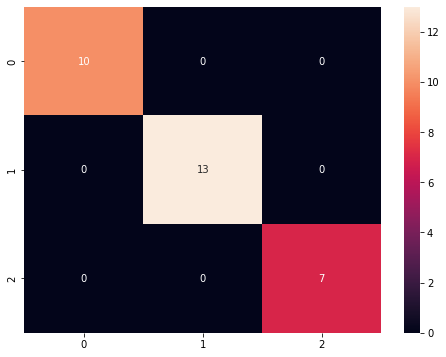

In [290]:
plt.figure(figsize=(8,6),edgecolor='green')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
sb.heatmap(cm, annot=True)